# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observation 1: Southern Hemisphere climates tend to be slightly milder than those at similar latitudes in the Northern
Hemisphere. This is because the Southern Hemisphere has significantly more ocean and much less land; water heats up 
and cools down more slowly than land. 
Observation 2: Highest temperature is found at 0 latitude and as the latidude increases or decreases, temperature 
drops. This happens as equatorial region receives sunlight straight with less or no angle due to the shape of earth. 
Observation 3: Latitude doesn't have a strong influence on wind speed. The speed of the wind is controlled by the 
strength of the air pressure gradient, the stronger the pressure gradient the higher the wind speed.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import time
import csv
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import datetime
import scipy.stats as st
from scipy.stats import linregress
from citipy import citipy
from pprint import pprint
from api_keys import weather_api_key
from api_keys import g_key

In [3]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
#         if len(cities)<100:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

In [5]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

# Perform API Calls
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
            
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")
    # Wait for 5 seconds
    if index_counter % 50 == 0:
        time.sleep(5)    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : mataura
Processing Record 2 of Set 1 : rikitea
Processing Record 3 of Set 1 : tateyama
Processing Record 4 of Set 1 : jamestown
Processing Record 5 of Set 1 : albany
Processing Record 6 of Set 1 : antalaha
Processing Record 7 of Set 1 : san isidro
Processing Record 8 of Set 1 : cherskiy
Processing Record 9 of Set 1 : yumen
City not found. Skipping...
Processing Record 10 of Set 1 : hilo
Processing Record 11 of Set 1 : vaini
Processing Record 12 of Set 1 : faanui
Processing Record 13 of Set 1 : eureka
Processing Record 14 of Set 1 : sibolga
Processing Record 15 of Set 1 : kavaratti
Processing Record 16 of Set 1 : kodiak
City not found. Skipping...
City not found. Skipping...
Processing Record 17 of Set 1 : ugoofaaru
Processing Record 18 of Set 1 : saurimo
Processing Record 19 of Set 1 : soubre
Processing Record 20 of Set 1 : puerto ayora
Processing Record 21 of Set 1 : atuona
Processing Record 22 of S

Processing Record 38 of Set 4 : imbituba
Processing Record 39 of Set 4 : cabo san lucas
Processing Record 40 of Set 4 : georgetown
Processing Record 41 of Set 4 : kabo
Processing Record 42 of Set 4 : waddan
Processing Record 43 of Set 4 : tuktoyaktuk
Processing Record 44 of Set 4 : linxia
Processing Record 45 of Set 4 : koson
Processing Record 46 of Set 4 : mangrol
Processing Record 47 of Set 4 : sorong
Processing Record 48 of Set 4 : teya
Processing Record 49 of Set 4 : bengkulu
Processing Record 50 of Set 4 : ruteng
Processing Record 0 of Set 5 : pisco
Processing Record 1 of Set 5 : rawson
Processing Record 2 of Set 5 : isangel
Processing Record 3 of Set 5 : sao joao do piaui
Processing Record 4 of Set 5 : charters towers
Processing Record 5 of Set 5 : nurota
Processing Record 6 of Set 5 : samoded
Processing Record 7 of Set 5 : yulara
Processing Record 8 of Set 5 : lokoja
Processing Record 9 of Set 5 : mount isa
Processing Record 10 of Set 5 : ballina
Processing Record 11 of Set 5 : 

Processing Record 26 of Set 8 : roebourne
Processing Record 27 of Set 8 : mafinga
City not found. Skipping...
City not found. Skipping...
Processing Record 28 of Set 8 : burnie
Processing Record 29 of Set 8 : haverfordwest
Processing Record 30 of Set 8 : meadow lake
Processing Record 31 of Set 8 : homestead
Processing Record 32 of Set 8 : vagur
Processing Record 33 of Set 8 : bridgeton
Processing Record 34 of Set 8 : bosaso
Processing Record 35 of Set 8 : ambilobe
Processing Record 36 of Set 8 : miyazu
Processing Record 37 of Set 8 : manado
Processing Record 38 of Set 8 : adrar
Processing Record 39 of Set 8 : lakes entrance
City not found. Skipping...
Processing Record 40 of Set 8 : nanortalik
Processing Record 41 of Set 8 : nelson bay
Processing Record 42 of Set 8 : anadyr
Processing Record 43 of Set 8 : peruibe
Processing Record 44 of Set 8 : beya
Processing Record 45 of Set 8 : la baneza
Processing Record 46 of Set 8 : otta
Processing Record 47 of Set 8 : oga
City not found. Skippin

Processing Record 8 of Set 12 : makubetsu
Processing Record 9 of Set 12 : lodja
Processing Record 10 of Set 12 : hurghada
Processing Record 11 of Set 12 : mbandaka
Processing Record 12 of Set 12 : ambulu
Processing Record 13 of Set 12 : mabaruma
Processing Record 14 of Set 12 : bireun
Processing Record 15 of Set 12 : ust-omchug
Processing Record 16 of Set 12 : rio gallegos
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({"City":city_name_list,
                             "Lat":lat_list,
                             "Lng":lng_list,
                             "Max Temp":max_temp_list,
                             "Humidity":humidity_list,
                             "Cloudiness":cloudiness_list,
                             "Wind Speed":wind_speed_list,
                             "Country":country_list,
                             "Date":date_list})    
weather_dict.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,54.00,64,67,11.01,NZ,1600700888
1,Rikitea,-23.12,-134.97,72.10,75,45,22.08,PF,1600700888
2,Tateyama,34.98,139.87,69.01,88,98,8.61,JP,1600700889
3,Jamestown,42.10,-79.24,57.00,61,1,5.82,US,1600700865
4,Albany,42.60,-73.97,53.01,51,0,2.66,US,1600700707


In [8]:
# Save city data into a csv file
weather_dict.to_csv("cities.csv", encoding='utf-8', index = False)

# Latitude vs. Temperature Plot

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs

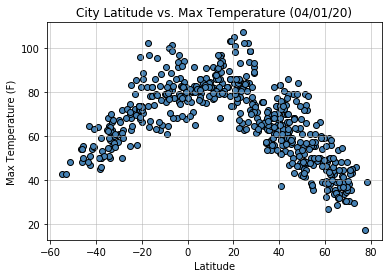

In [9]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (04/01/20)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Max Temperature.png")

Highest temperature is found close to 40 latitude and as the latidude increases or decreases, temperature drops.

# Latitude vs. Humidity Plot

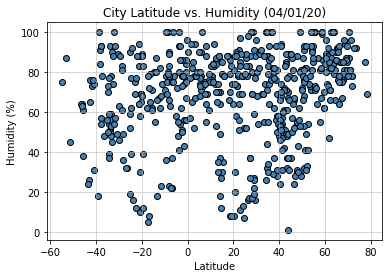

In [10]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (04/01/20)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Humidity.png")

Polar regions have lower humidity and as latitude gets higher,humidity gets higher in southern hemisphere.

# Latitude vs. Cloudiness Plot

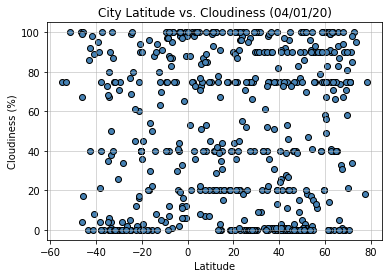

In [11]:
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (04/01/20)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Cloudiness.png")

The data for cloudiness is spread across the latitude

# Latitude vs. Wind Speed Plot

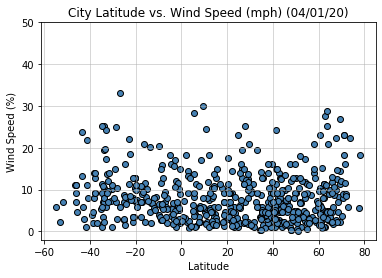

In [12]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (04/01/20)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Wind Speed (mph).png")


Wind speed data is widely spread across the latitude

# Linear Regression

In [23]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

In [24]:
# Define function for creating linear regression and scatter plot
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.83


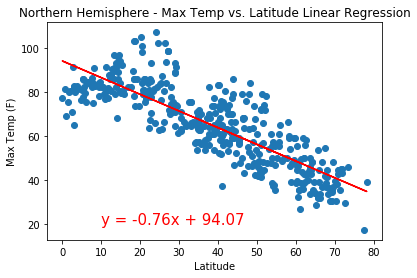

In [25]:
# Call a function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call a function #2
annotate(equation, 10, 20)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

There is a strong negative correlation between latitude and max temperature for northern hemisphere.

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.78


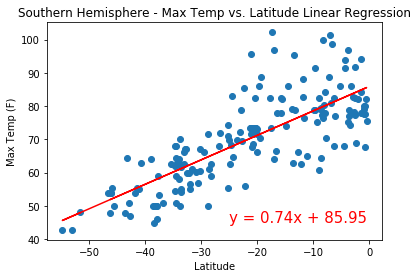

In [28]:
# Call a function #1
equation = linear_regression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call a function #2
annotate(equation, -25, 45)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")


There is a positive correlation between latitude and max temperature for southern hemisphere.


# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.16


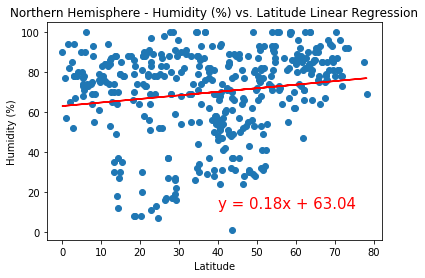

In [30]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 12)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

There is low positive correlation between latitude and humidity for northern hemisphere

# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.12


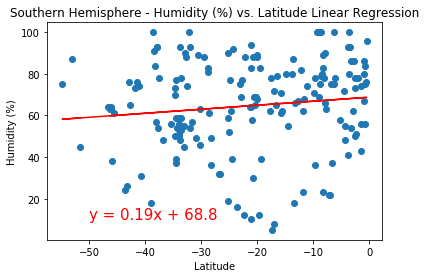

In [33]:
# Call a function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call a function #2
annotate(equation, -50, 10)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

There is a low positive correlation between latitude and humidity for southern hemisphere.


# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.01


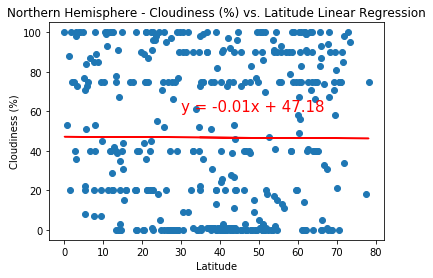

In [37]:
# Call a function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call a function #2
annotate(equation, 30, 60)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

There is a very low negative correlation between latitude and cloudiness for Northern hemisphere.

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.15


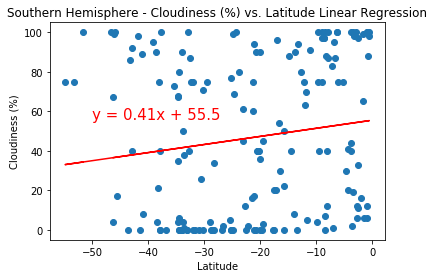

In [42]:
# Call a function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call a function #2
annotate(equation, -50, 56)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

There is a low positive correlation between latitude and cloudiness for Southern hemisphere.


# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.1


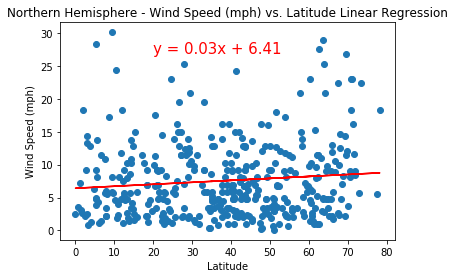

In [47]:
# Call a function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call a function #2
annotate(equation, 20, 27)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

There is a weak positive correlation between latitude and windspeed for Northern hemisphere.

# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression¶

The r-squared is : -0.16


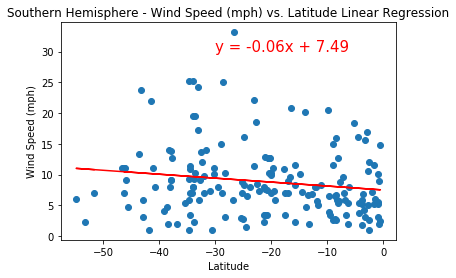

In [49]:
# Call a function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call a function #2
annotate(equation, -30, 30)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

There is a weak negative correlation between latitude and wind speed for Southern hemisphere.